In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [22]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

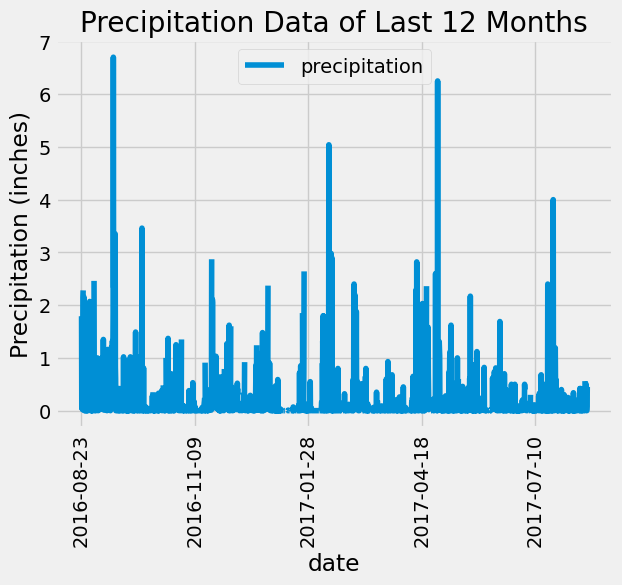

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent=pd.to_datetime(most_recent)
# Calculate the date one year from the last date in data set.
one_year_ago= most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year_ago= one_year_ago.strftime('%Y-%m-%d')
data = session.query(measurement.date, measurement.prcp)\
    .filter(measurement.date >= one_year_ago[0]).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df=pd.DataFrame(data, columns=['date', 'precipitation'])

# Sort the dataframe by date
data_df = data_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot(x='date', y='precipitation', rot=90)
plt.title('Precipitation Data of Last 12 Months')
plt.ylabel('Precipitation (inches)')
plt.show()

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats_df=pd.DataFrame(data_df['precipitation'].describe())
summary_stats_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()

print("The total number of stations is", total_stations)

The total number of stations is 9


In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active=session.query(measurement.station, func.count(measurement.station))\
    .group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_summary= session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs))\
    .filter(measurement.station==most_active[0]).all()

temperature_summary[0]= lowest_temp, highest_temp, avg_temp
print(f"Lowest Temp: {lowest_temp}")
print(f"Highest Temp: {highest_temp}")
print(f"Average Temp: {avg_temp}")




Lowest Temp: 54.0
Highest Temp: 85.0
Average Temp: 71.66378066378067


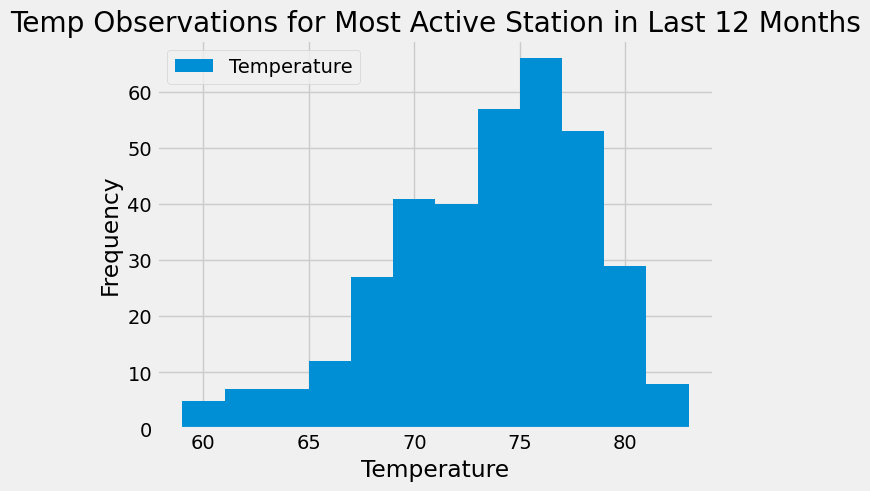

In [66]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(measurement.tobs)\
    .filter(measurement.station==most_active[0]).filter(measurement.date >= one_year_ago[0]).all()
station_data_df = pd.DataFrame(station_data, columns=['Temperature'])
station_data_df.plot(kind='hist', bins=12)
plt.title(f'Temp Observations for Most Active Station in Last 12 Months')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [67]:
# Close Session
session.close()